**IMPORT DAN BACA DATASET**

In [5]:
import pandas as pd

# Contoh: load dataset IMDB
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

# Filter hanya 100 positif & 100 negatif
positif = df[df['sentiment'] == 'positive'].sample(100, random_state=42)
negatif = df[df['sentiment'] == 'negative'].sample(100, random_state=42)

# Gabungkan jadi satu dataframe
df_selected = pd.concat([positif, negatif])

**PREPROCESSING**

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_selected['review'])

sequences = tokenizer.texts_to_sequences(df_selected['review'])
padded = pad_sequences(sequences, maxlen=200)

labels = df_selected['sentiment'].map({'positive': 1, 'negative': 0})

# Tentukan vocab_size dan maxlen
vocab_size = len(tokenizer.word_index) + 1
maxlen = 200

**MODEL**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(maxlen,)),
    LSTM(64, dropout=0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 200, 128)            │         974,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,024,449 (3.91 MB)

 Trainable params: 1,024,449 (3.91 MB)

 Non-trainable params: 0 (0.00 B)

**TRAINING**

In [8]:
history = model.fit(padded, labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.5756 - loss: 0.6913 - val_accuracy: 0.0000e+00 - val_loss: 0.7211
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6532 - loss: 0.6776 - val_accuracy: 0.0000e+00 - val_loss: 0.7692
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6155 - loss: 0.6594 - val_accuracy: 0.0000e+00 - val_loss: 0.9014
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5933 - loss: 0.6311 - val_accuracy: 0.0000e+00 - val_loss: 1.2741
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6793 - loss: 0.5353 - val_accuracy: 0.0000e+00 - val_loss: 1.0344
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6391 - loss: 0.5317 - val_accuracy: 0.0000e+00 - val_loss: 1.0795
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7110 - loss: 0.4661 - val_accuracy: 0.0500 - val_loss: 0.8464
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9741 - loss: 0.4415 - val_accu

**EVALUASI DAN VISUALISASI**

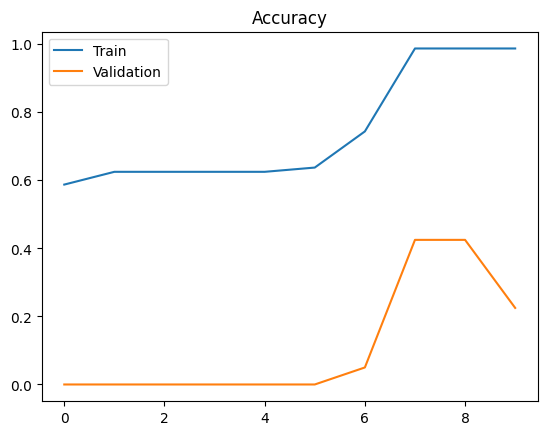

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()
plt.show()

**CONFUSION MATRIX**

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


<Axes: >

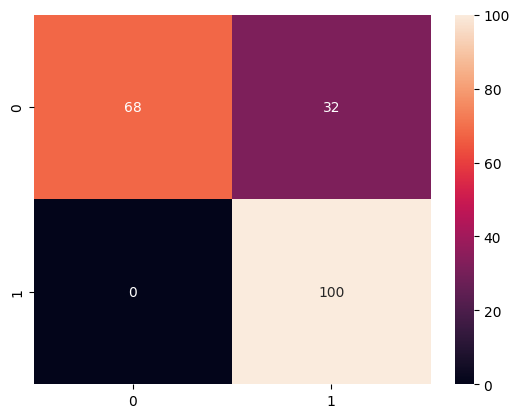

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(padded)
y_pred = (y_pred > 0.5).astype(int).flatten()

cm = confusion_matrix(labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d')